In [1]:
# Gerekli kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Makine öğrenmesi modelleri ve metrikler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:

# Veri kümesini oku
df = pd.read_csv("housing.csv")

In [4]:
# Eksik değer kontrolü ve doldurma
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

C:\Users\ebeng\AppData\Local\Temp\ipykernel_18512\4081454087.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [5]:
# Kategorik veriyi sayısal değere dönüştür
mapping = {
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'NEAR BAY': 4,
    'ISLAND': 5
    }

df['ocean_proximity'] = df['ocean_proximity'].map(mapping)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049454
ocean_proximity             0.021732
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
Name: median_house_value, dtype: float64


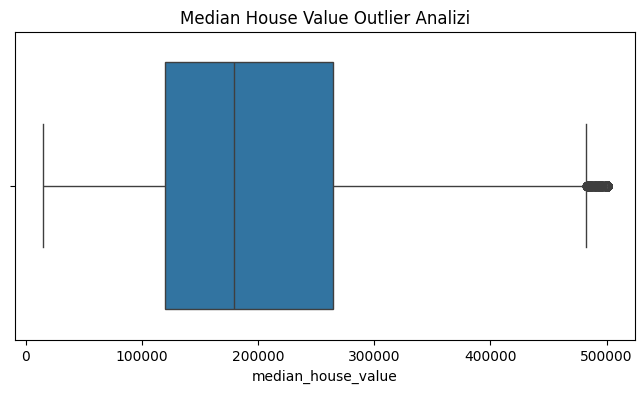

In [6]:
# Özellik mühendisliği: Yeni sütunlar oluşturma
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']

# Korelasyonları kontrol et
print(df.corr()['median_house_value'].sort_values(ascending=False))

# Sayısal özellikleri ölçeklendirme
from sklearn.preprocessing import StandardScaler
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove('median_house_value')
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Outlier analizi (boxplot ile görselleştirme)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['median_house_value'])
plt.title('Median House Value Outlier Analizi')
plt.show()

# Verinin hazır olduğunu

In [38]:
# Veriyi bağımsız (X) ve bağımlı (y) değişken olarak ayır
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [39]:
# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 1. Linear Regression Modeli
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [40]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [41]:
# 3. Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=1)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [42]:
# Performans Metrikleri
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

In [43]:
print("Random Forest Model Sonuçları:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)

Random Forest Model Sonuçları:
MAE: 31819.375988372092
MSE: 2426224335.5423956
RMSE: 49256.71868428098


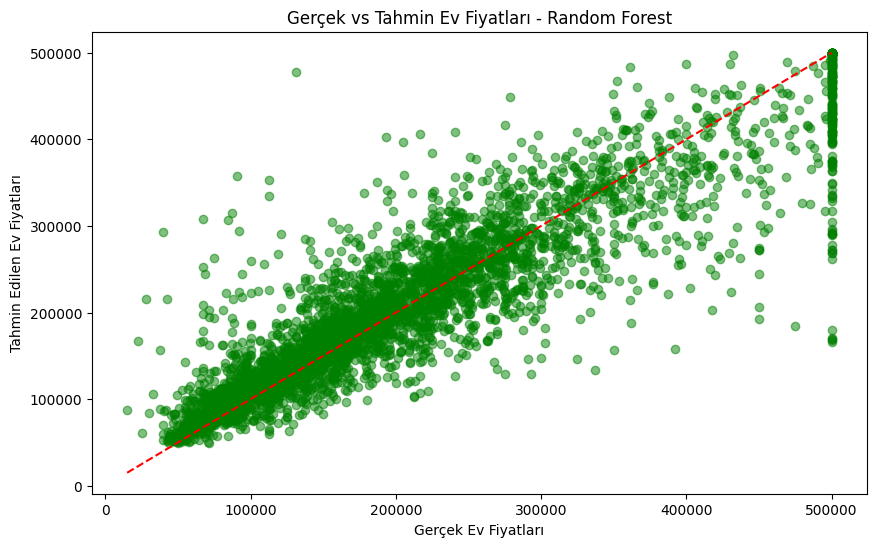

In [44]:
# Scatter Plot: Gerçek vs Tahmin Ev Fiyatları
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="green")
plt.xlabel("Gerçek Ev Fiyatları")
plt.ylabel("Tahmin Edilen Ev Fiyatları")
plt.title("Gerçek vs Tahmin Ev Fiyatları - Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

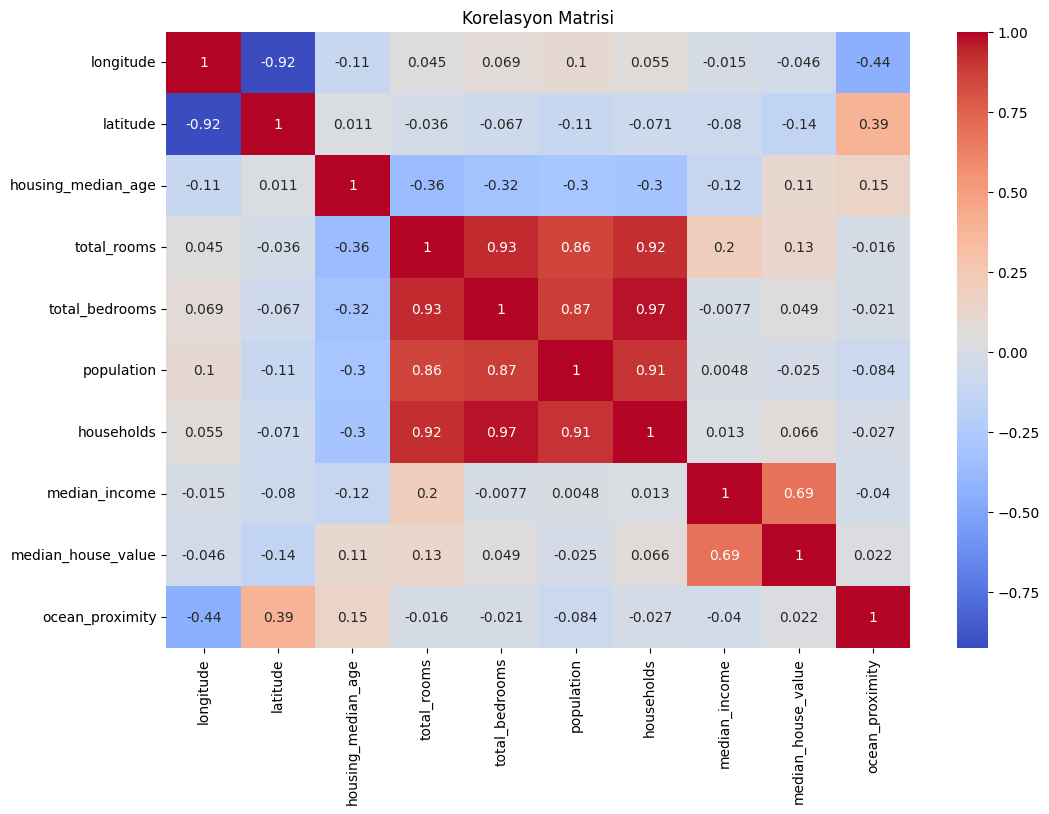

In [45]:
# Korelasyon matrisi görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

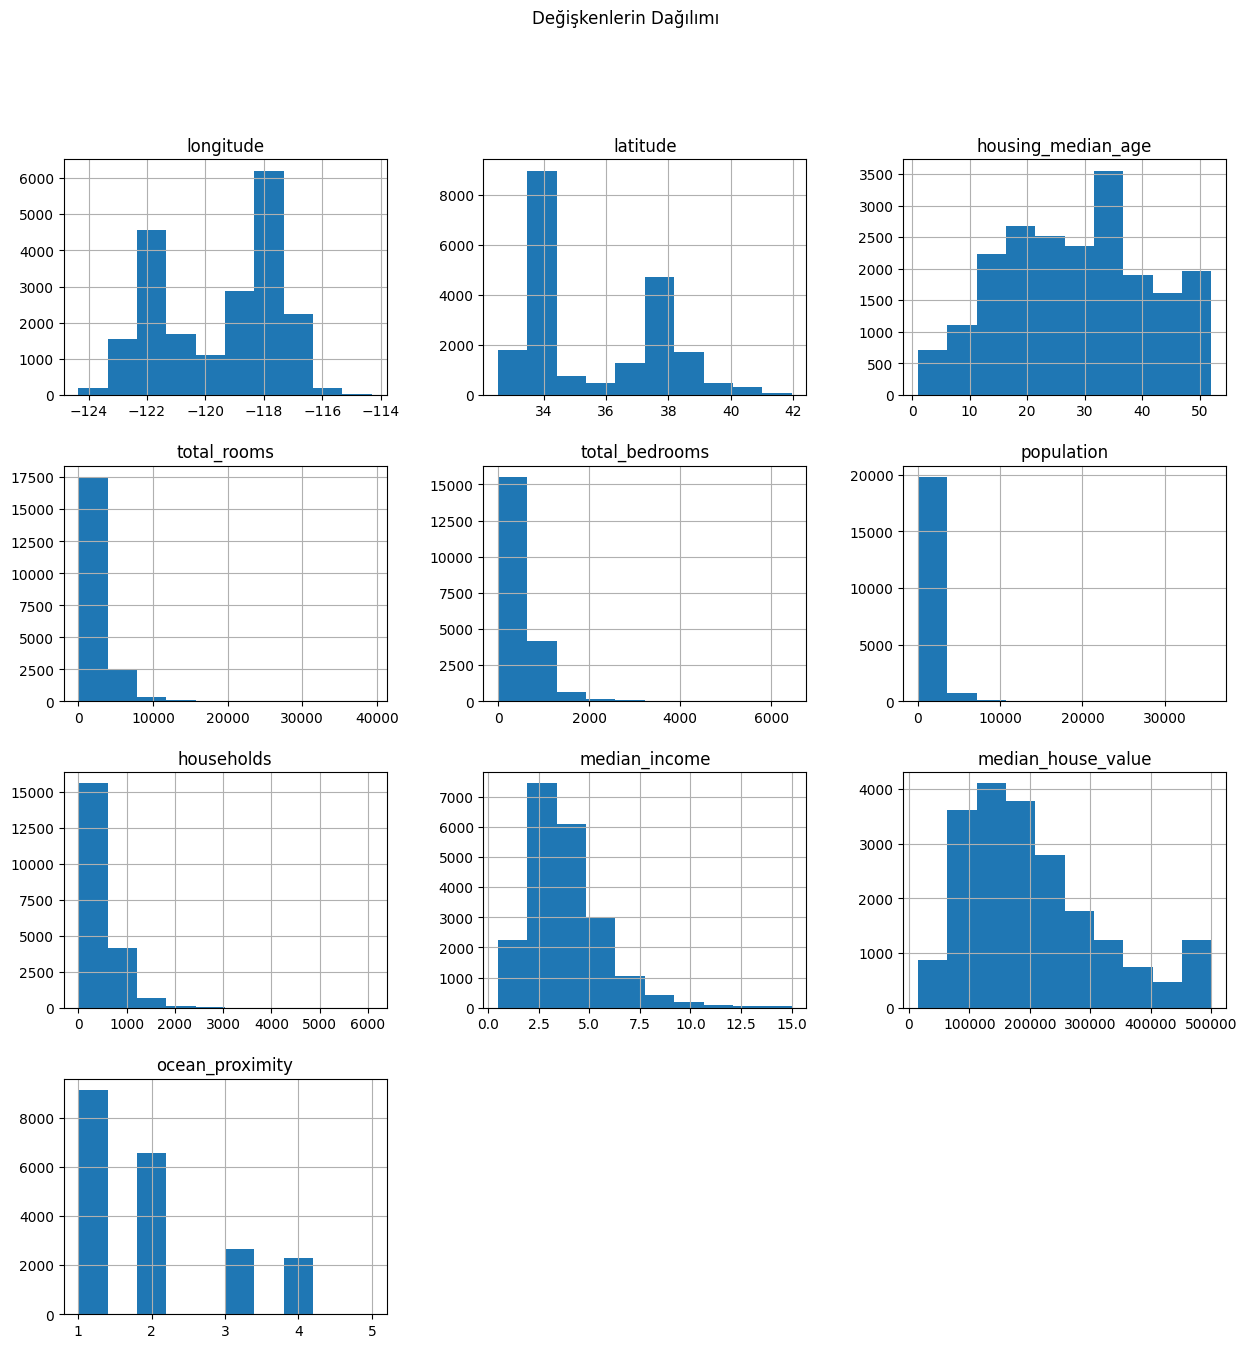

In [46]:
# Özelliklerin dağılımı
df.hist(figsize=(15, 15))
plt.suptitle("Değişkenlerin Dağılımı")
plt.show()


In [47]:
# Linear Regression değerlendirme
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Gradient Boosting değerlendirme
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("\nLinear Regression Sonuçları:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)

print("\nGradient Boosting Sonuçları:")
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)



Linear Regression Sonuçları:
MAE: 50879.51264240585
MSE: 4877464158.050287
RMSE: 69838.844191827

Gradient Boosting Sonuçları:
MAE: 38199.79139329014
MSE: 3005537743.8172193
RMSE: 54822.78489658492
